**1 Project Scoping**

In this project a dataset of blood test results and their exisiting condition will be used to make predictions about future patients based on their blood test results. This will be done usign unsupervised machine learning algorithms. This will involve the following steps:

    1) Importing appropriate packages
    2) Importing data
    3) Exploratory data analysis - including summary statistics and data visualisation of the data
    4) Principal component analysis - To reduce the dimensionality of the dataset
    5) Implementation of Kmeans and Kmeans++ algorithms
    6) Optimisation of the algorithms
    7) Conclusion about the projects results.

**2 Import packages**

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

**3 Load in dataset**

In [13]:
data = pd.read_csv('hcvdat0.csv')

**3.1 Inspect data**

In [14]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**Data variables**

    Category - whether the patient was just a blood donor or if they have HCV
    Age - Patient's age
    Sex - Patient's sex
    ALB - Albumin levels
    ALP - Alkaline phosphate level
    ALT - Alanine transaminase level
    AST - Aspartate Aminotransferase
    BIL - Bilirubin level
    CHE - Cholinesterase levels
    CHOL - Cholesterol levels
    CREA - Creatinine levels
    GGT - Gamma-glutamyltransferase level
    PROT - Total protein levles

**3.2 Clean data - mapping characters values to numerical values**

In [18]:
data['Category'] = data.Category.map({'0=Blood Donor':0, '0s:suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':2, '3=Cirrhosis':3})

In [22]:
data.Sex = data.Sex.apply(lambda x: 0 if x == 'm' else 1)

**4 Summary statistics**

**4.1 Number of males and females** - It can be seen that there are more males than females in the dataset, possibly suggesting a biased dataset.

In [26]:
num_of_sex = data.Sex.value_counts()
num_of_sex

0    377
1    238
Name: Sex, dtype: int64

**4.2 Number of each category** - **seems a bit of a biased data set?**

In [40]:
num_of_category = data.Category.value_counts()
num_of_category

0.0    533
3.0     30
1.0     24
2.0     21
Name: Category, dtype: int64

**4.3 Number of males and females by category**

In [28]:
num_of_sex_by_category = data.groupby('Category').Sex.value_counts()
anum_of_sex_by_category

Category  Sex
0.0       0      318
          1      215
1.0       0       20
          1        4
2.0       0       13
          1        8
3.0       0       20
          1       10
Name: Sex, dtype: int64

**4.4 Mean age by category**

In [42]:
mean_age_by_category = data.groupby('Category').Age.mean()
mean_age_by_category

Category
0.0    47.131332
1.0    38.708333
2.0    52.333333
3.0    53.466667
Name: Age, dtype: float64

**4.5 Mean Albumin levels by category** - ALB levels seems to be very similar for categories 0, 1 and 2 but slightly lower for category 3

In [30]:
mean_ALB_by_category = data.groupby('Category').ALB.mean()
mean_ALB_by_category

Category
0.0    42.238274
1.0    43.833333
2.0    41.761905
3.0    32.482759
Name: ALB, dtype: float64

**4.6 Mean Alanine transaminase levels by category** - ALT levels seems to be similar for categories 0, 1 and 3 but a lot higher for category 2. This may imply that people with fibrosis have higher ALT levels.

In [31]:
mean_ALT_by_category = data.groupby('Category').ALT.mean()
mean_ALT_by_category

Category
0.0    26.63152
1.0    26.90000
2.0    59.60000
3.0    22.97000
Name: ALT, dtype: float64

**4.7 Mean aspartate aminotransferase levels by category** - AST levels are significantly lower in category 0 compared to the others, implying people with fibrosis and cirrhosis have higher AST levels.

In [32]:
mean_AST_by_category = data.groupby('Category').AST.mean()
mean_AST_by_category

Category
0.0     26.549156
1.0     75.733333
2.0     81.171429
3.0    107.456667
Name: AST, dtype: float64

**4.8 Mean Bilirubin levels by category** - Pateints in category 3 have significantly higher BIL levels, impyling people with cirrhosis have higher BIL levels.

In [33]:
mean_BIL_by_category = data.groupby('Category').BIL.mean()
mean_BIL_by_category

Category
0.0     8.527580
1.0    15.625000
2.0    13.428571
3.0    59.133333
Name: BIL, dtype: float64

**4.9 Mean Cholinsterase levels by category** - Category 3 pateints have lower CHE levels compared to the other categories, implying CHE levels are lower in people with cirrhosis.

In [34]:
mean_CHE_by_category = data.groupby('Category').CHE.mean()
mean_CHE_by_category

Category
0.0    8.398086
1.0    9.283750
2.0    8.334762
3.0    3.818333
Name: CHE, dtype: float64

**4.10 Mean cholesterol levels by category** - Cholesterol levels seems to be fairly constant throughout the different categories

In [35]:
mean_CHOL_by_category = data.groupby('Category').CHOL.mean()
mean_CHOL_by_category

Category
0.0    5.494316
1.0    5.099167
2.0    4.595500
3.0    4.008571
Name: CHOL, dtype: float64

**4.11 Mean creatinine by category** - Creatinine levels are a lot higher in people with cirrhosis, implying cirrhosis increases creatinine levels

In [36]:
mean_CREA_by_category = data.groupby('Category').CREA.mean()
mean_CREA_by_category

Category
0.0     78.977486
1.0     73.958333
2.0     73.490476
3.0    138.223333
Name: CREA, dtype: float64

**4.12 Mean Gamma-glutamyltransferase level by category** - GGT levels are higher in category 3, implying people with cirrhosis have higher GGT levels.

In [37]:
mean_GGT_by_category = data.groupby('Category').GGT.mean()
mean_GGT_by_category

Category
0.0     29.036773
1.0     92.579167
2.0     79.552381
3.0    129.440000
Name: GGT, dtype: float64

**4.13 Mean total protein levels by category** - Total protein levels seem to be fairly constant throughout all categories

In [38]:
mean_PROT_by_category = data.groupby('Category').PROT.mean()
mean_PROT_by_category

Category
0.0    72.111257
1.0    74.700000
2.0    76.100000
3.0    70.051724
Name: PROT, dtype: float64

**4.14 Mean age by sex** - Very similar mean age between sexs

In [45]:
mean_age_by_sex = data.groupby('Sex').Age.mean()
mean_age_by_sex

Sex
0    47.212202
1    47.718487
Name: Age, dtype: float64

**4.15 Mean Albumin levels by sex** - ALB levels are quite similar between male and females

In [46]:
mean_ALB_by_sex = data.groupby('Sex').ALB.mean()
mean_ALB_by_sex

Sex
0    42.291755
1    40.559244
Name: ALB, dtype: float64

**4.16 Mean Alanine transaminase levels by sex** - ALT levels seem to be higher in males

In [47]:
mean_ALT_by_sex = data.groupby('Sex').ALT.mean()
mean_ALT_by_sex

Sex
0    31.728191
1    23.273109
Name: ALT, dtype: float64

**4.17 Mean aspartate aminotransferase levels by sex** - AST levels seem to be higher in males.

In [48]:
mean_AST_by_sex = data.groupby('Sex').AST.mean()
mean_AST_by_sex

Sex
0    38.224934
1    29.339496
Name: AST, dtype: float64

**4.18 Mean Bilirubin levels by category** - BIL levels seem to be higher in males

In [49]:
mean_BIL_by_sex = data.groupby('Sex').BIL.mean()
mean_BIL_by_sex

Sex
0    13.133156
1     8.646218
Name: BIL, dtype: float64

**4.19 Mean Cholinsterase levels by category** - CHE levels seem to be quite similar between males and females.

In [50]:
mean_CHE_by_sex = data.groupby('Sex').CHE.mean()
mean_CHE_by_sex

Sex
0    8.492759
1    7.727563
Name: CHE, dtype: float64

**4.20 Mean cholesterol levels by category** - Very similar cholesterol levels in males and females

In [51]:
mean_CHOL_by_sex = data.groupby('Sex').CHOL.mean()
mean_CHOL_by_sex

Sex
0    5.341230
1    5.411602
Name: CHOL, dtype: float64

**4.21 Mean creatinine by category** - CREA levels seem to be higher in males

In [52]:
mean_CREA_by_sex = data.groupby('Sex').CREA.mean()
mean_CREA_by_sex

Sex
0    87.591777
1    71.302101
Name: CREA, dtype: float64

**4.22 Mean Gamma-glutamyltransferase level by category** - GGT levels are higher in males

In [53]:
mean_GGT_by_sex = data.groupby('Sex').GGT.mean()
mean_GGT_by_sex

Sex
0    45.316711
1    30.371849
Name: GGT, dtype: float64

**4.23 Mean total protein levels by category** - Total protein levels are very comparable in males and females

In [54]:
mean_PROT_by_sex = data.groupby('Sex').PROT.mean()
mean_PROT_by_sex

Sex
0    72.264362
1    71.696218
Name: PROT, dtype: float64

**5 Data Visualisation**

Visualisations were made of the features that significantly differed based on category

histograms of these by genders and category, side by side boxplots of these variables by category??

**5.1 Histogram of age**

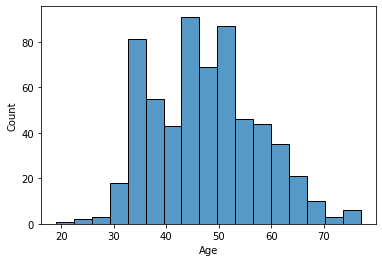

In [64]:
sns.histplot(data=data, x='Age')
plt.show()

**5.2 ALT histogram for people with fibrosis (category 2)** - Maybe some outliers in this data based on the distribution shown in the histogram

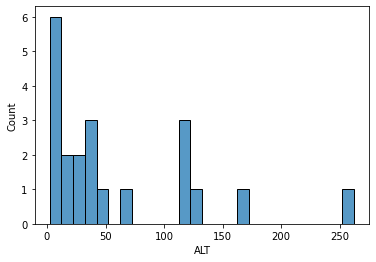

In [63]:
ALT_category2 = data[data.Category == 2.0]
ALT_category2
sns.histplot(data=ALT_category2, x='ALT', binwidth=10)
plt.show()

**5.3 AST histogram for people with cirrhosis (category 3)**

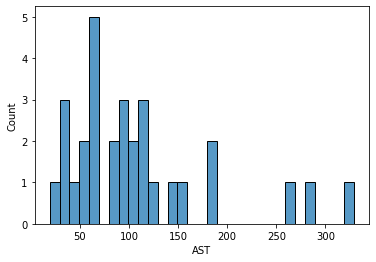

In [70]:
AST_category3 = data[data.Category == 3.0]
AST_category3
sns.histplot(data=AST_category3, x='AST', binwidth=10)
plt.show()

**5.4 BIL histogram for people with cirrhosis (category 3)** - Possible right skew

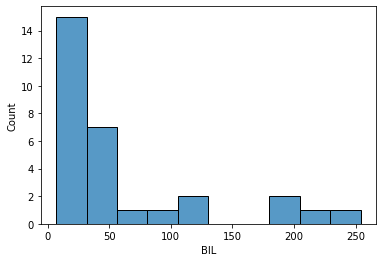

In [71]:
BIL_category3 = data[data.Category == 3.0]
BIL_category3
sns.histplot(data=BIL_category3, x='BIL')
plt.show()

**5.5 CREA histogram for people with cirrhosis (category 3)** - Very large outliers

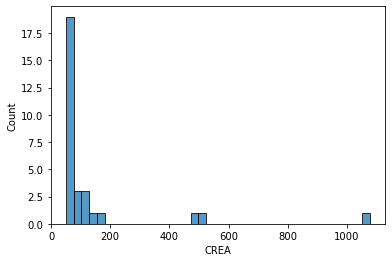

In [69]:
CREA_category2 = data[data.Category == 3.0]
CREA_category2
sns.histplot(data=CREA_category2, x='CREA')
plt.show()

**5.6 GGT histogram for people with cirrhosis** - Outliers with large GGT values

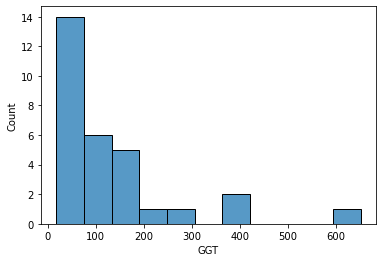

In [73]:
GGT_category3 = data[data.Category == 3.0]
GGT_category3
sns.histplot(data=GGT_category3, x='GGT')
plt.show()

**5.7 ALB boxplot by category**

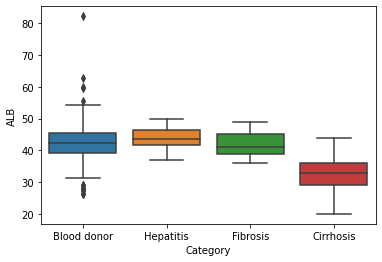

In [81]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALB')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

ALB	ALP	ALT	AST	BIL	CHE	CHOL	CREA	GGT	PROT

**5.8 ALP boxplot by category** - There are large outliers in the cirrhosis category

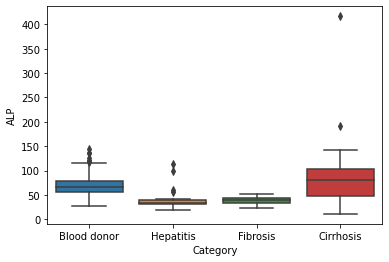

In [82]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALP')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.9 ALT boxplot by category**

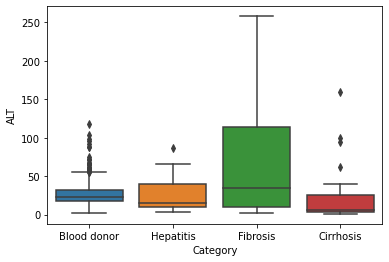

In [83]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALT')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.10 AST boxplot by category**

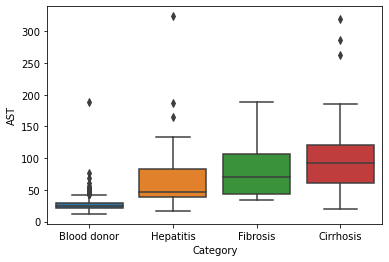

In [84]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='AST')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.11 BIL boxplot by category** - There are large outliers in the cirrhosis category

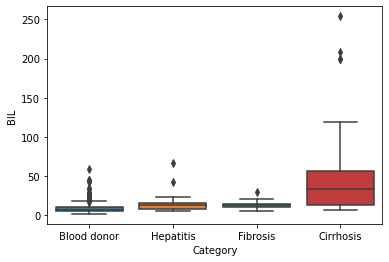

In [85]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='BIL')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.12 CHE boxplot by category**

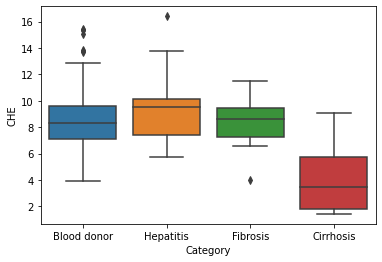

In [86]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='CHE')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.13 CHOL boxplot by category**

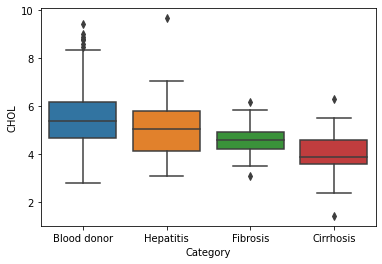

In [87]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='CHOL')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.14 CREA boxplot by category**

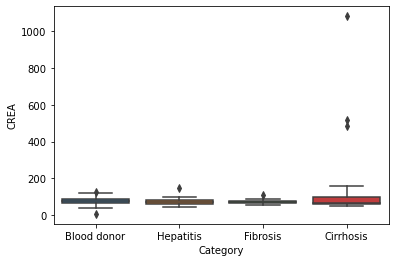

In [88]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='CREA')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.15 GGT boxplot by category** - There are large outliers in the cirrhosis category

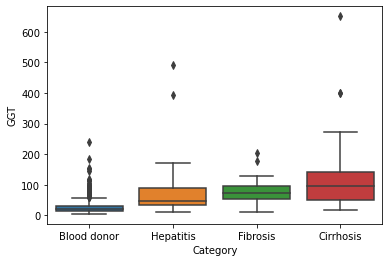

In [89]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='GGT')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.16 PROT boxplot by category**

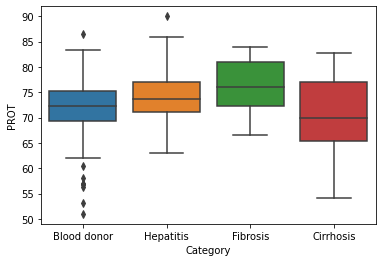

In [90]:
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='PROT')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

**5.17 Scatter plot of AST versus BIL** - Slight positive correlation between AST and BIL levels but not a major correlation

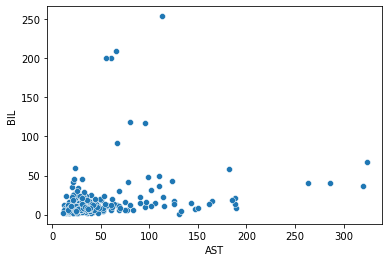

In [91]:
ax = plt.subplot()
sns.scatterplot(data=data, x='AST', y='BIL')
plt.show()

**5.18 Scatter plot of AST versus CREA** - No correlation between CREA and AST levels

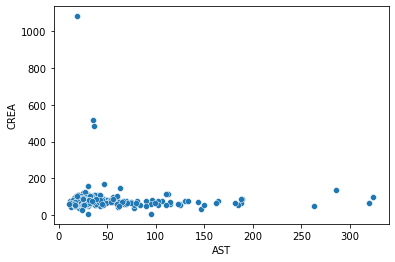

In [92]:
ax = plt.subplot()
sns.scatterplot(data=data, x='AST', y='CREA')
plt.show()

**5.19 Scatter plot of AST versus GGT** - Positive correlation between GGT and AST levels

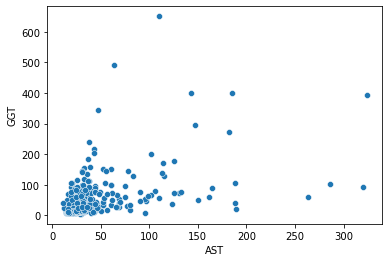

In [93]:
ax = plt.subplot()
sns.scatterplot(data=data, x='AST', y='GGT')
plt.show()

**5.20 Scatter plot of BIL versus CREA** - No apparent correlation between CREA and BIL levels

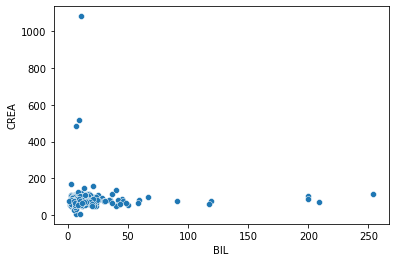

In [94]:
ax = plt.subplot()
sns.scatterplot(data=data, x='BIL', y='CREA')
plt.show()

**5.21 Scatter plot of BIL versus GGT** - No strong correlation between BIL and GGT levels

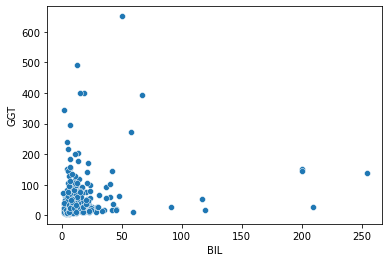

In [95]:
ax = plt.subplot()
sns.scatterplot(data=data, x='BIL', y='GGT')
plt.show()

**5.22 Scatter plot of CREA versus GGT** - No strong correlation between CREA and GGT levels

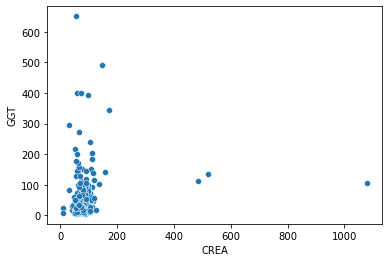

In [96]:
ax = plt.subplot()
sns.scatterplot(data=data, x='CREA', y='GGT')
plt.show()

**5.23 Pairplot of data** - Not the clearest plot but can see some variables that have correlations between each other

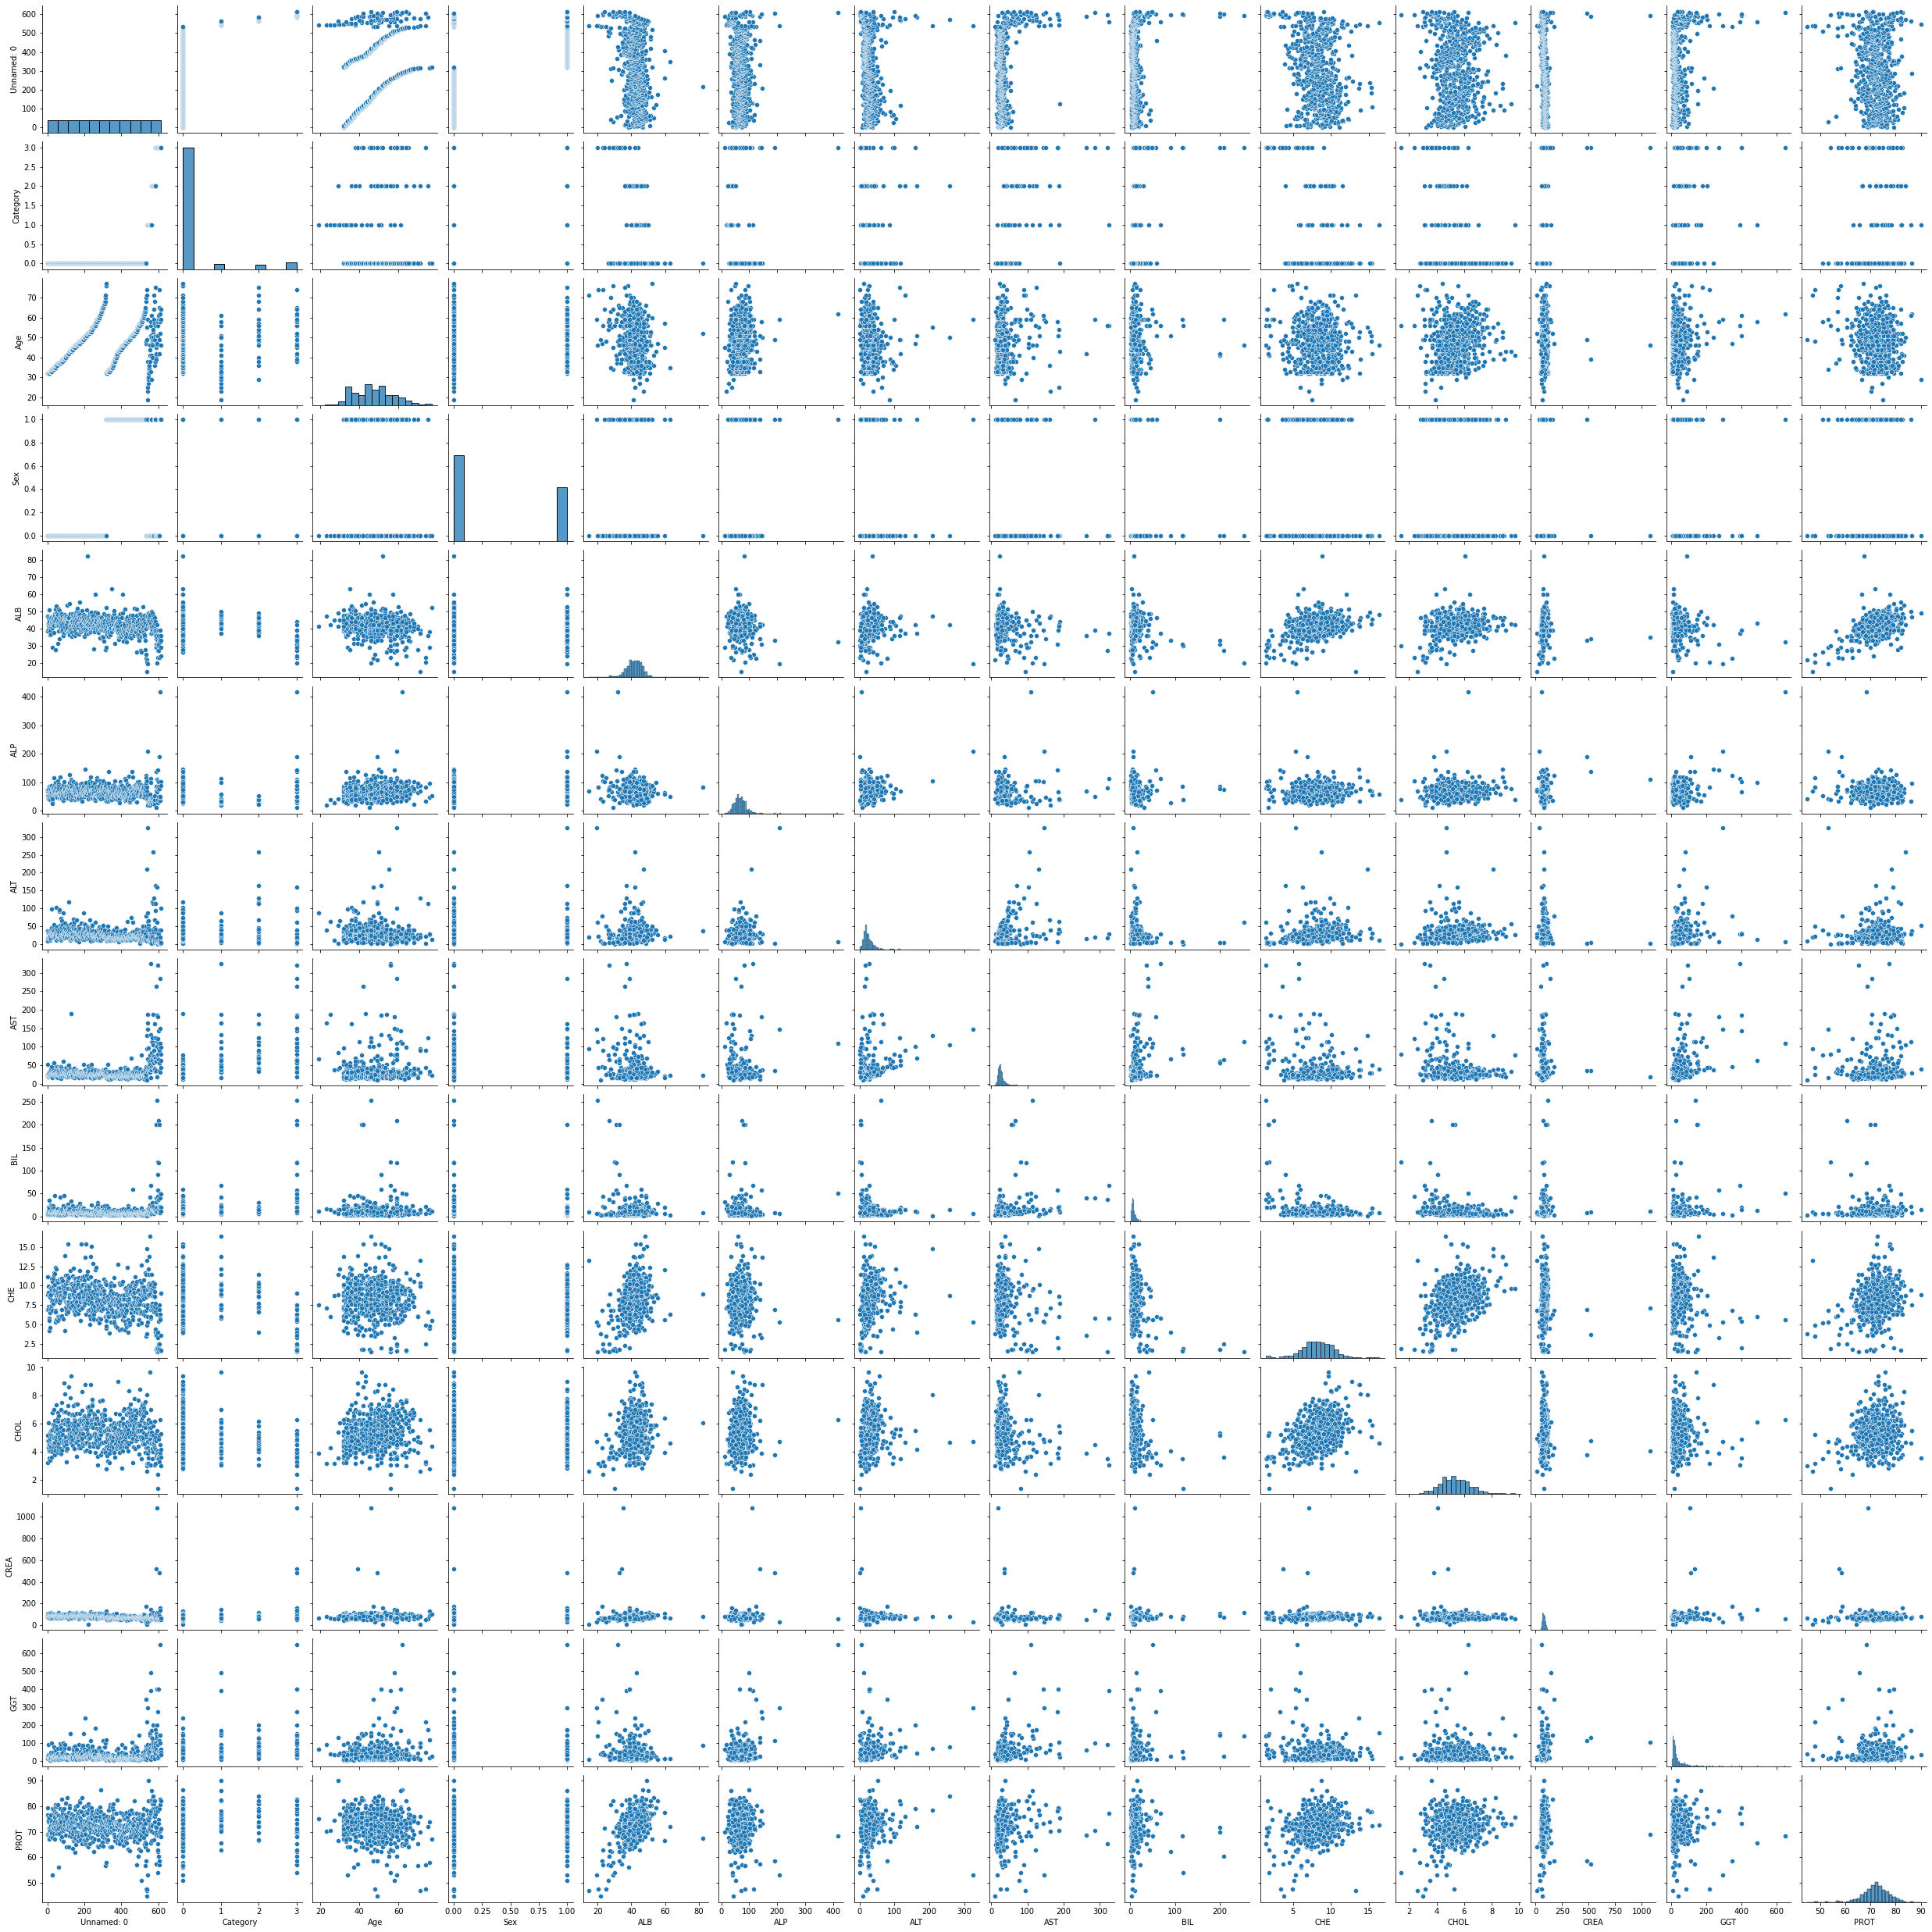

In [97]:
sns.pairplot(data)
plt.show()

**6 Standardising data before implementing ML algorithms**

In [120]:
data_without_categories = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].dropna() # drop the NaNs from the relevant data
labels = data[['Category']]
scaler = StandardScaler() # Standardising class from sklearn
scaled_data = scaler.fit_transform(data_without_categories) # Standardise data

**7 Prinicipal component analysis to reduce datas dimensionality** - improves computational time, interpretability and minimises information loss

In [130]:
data_pca = PCA(n_components=12) # Do 12 components at first and then can choose which to keep later
components = data_pca.fit(scaled_data).components_ # Creating dummy variable so we can see which components we want to include before changing the actual dataset
components = pd.DataFrame(components).transpose() 
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
components.index =  data_without_categories.columns
components

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Age,0.172134,0.102528,0.410235,-0.141937,-0.317705,-0.615725,-0.402228,-0.118344,0.287541,0.147092,0.064996,-0.083858
Sex,0.022322,-0.287773,0.343857,-0.374166,-0.215527,0.598740,-0.140062,0.254792,0.179616,0.229658,0.289384,-0.014983
ALB,-0.448982,0.132416,-0.313601,-0.036295,-0.212278,0.023960,-0.149646,-0.310266,0.226894,-0.215431,0.534160,0.365658
ALP,0.175163,0.415676,0.337492,0.119458,-0.200408,0.326156,0.235772,-0.491128,0.002312,0.174225,-0.244964,0.366957
ALT,-0.029360,0.435170,0.063373,-0.073419,0.593255,0.107071,0.021252,0.082240,0.632616,-0.008330,0.028163,-0.169300
AST,0.333897,0.288781,-0.337455,-0.312787,0.099462,-0.012337,-0.361566,0.335600,-0.160109,0.153726,-0.108180,0.528237
BIL,0.328683,0.037158,-0.353025,-0.142870,-0.316459,-0.173983,0.647900,0.128330,0.272959,0.236256,0.211019,-0.063536
CHE,-0.431579,0.281027,0.114303,0.063003,0.134168,-0.139634,0.095254,0.129425,-0.360271,0.669660,0.268165,-0.065221
CHOL,-0.313387,0.269531,0.354637,-0.167320,-0.211260,-0.132910,0.308452,0.507826,-0.059760,-0.452935,-0.119190,0.192679
CREA,0.062715,0.133189,-0.067778,0.773116,-0.295809,0.149773,-0.214951,0.410293,0.214265,0.071561,0.022615,0.002184


Looking at the variance explained by each principal component so that we can decide which variables to keep.

In [135]:
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
var_ratio= pd.DataFrame(var_ratio).transpose() # Transposes the data to make it easier to read
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
var_ratio.index = ['Proportion of Variance']
var_ratio

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Proportion of Variance,0.204596,0.161009,0.118306,0.093358,0.087178,0.077772,0.059891,0.052265,0.047341,0.03895,0.032881,0.026452


Plot the variation explained by each component and use the elbow method to decide how many variables to keep.

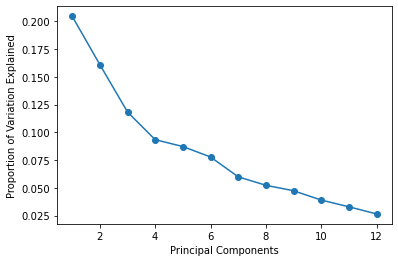

In [180]:
len_columns = len(components.columns)
x_axis = list(range(1, len_columns+1))
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
plt.plot(x_axis, var_ratio, '-o')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variation Explained')
plt.show()

Based on the above graph there does not seem to be a specific elbow to cut the data off at. However, it was decided that 11 components would be used, as this will still describe over 97% of the data variation.

Alter the actual data to use in the machine learning algorithm

In [145]:
data_pcomp = data_pca.fit_transform(scaled_data)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp = data_pcomp.iloc[:,0:11]
data_pcomp.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11']
data_pcomp.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11
0,0.623917,-1.715135,-1.393532,1.498619,0.837848,0.458334,0.045456,-0.574277,-0.736804,0.089906,-0.307661
1,-1.114720,-0.052790,-0.803039,0.585460,0.686483,0.444380,0.570405,-0.236584,-1.275217,0.965889,-0.900748
2,-1.167694,0.930200,-1.675495,0.103909,0.381158,0.869208,0.020674,-0.300067,-0.143235,-0.047137,-0.685328
3,-0.421024,-0.321216,-1.725682,0.327997,0.489290,0.455055,0.653352,-0.221089,0.054020,-0.408415,-0.342520
4,0.092011,-0.190595,-0.633850,0.898238,1.410894,0.529664,0.791346,-0.516654,-0.611468,0.332327,-0.101663


**8 Unsupervised Machine Learning**

**8.1 K means model** - initially we will use 4 clusters

In [197]:
Kmeans_model = KMeans(n_clusters=4, init='random')
Kmeans_model.fit(data_pcomp)
Kmeans_model.inertia_

4785.126306467359

**8.2 K means ++ model** - Initally we will use 4 clusters

In [178]:
Kmeans_plus_model = KMeans(n_clusters=4, init='k-means++')
Kmeans_plus_model.fit(data_pcomp)
Kmeans_plus_model.inertia_

4856.5581554090195

This shows that based on 4 clusters the K means ++ model did not significantly improve the inertia of the model. This implies that the random initialisation of the centroids in the k means model did not massively impact the results of the model.

**8.3 Optimising algorithms**

A function will be built to test different numbers of clusters on the model to find the best one. This will be decided using the elbow method.

In [194]:
def num_of_clusters(data, num_clusters, model_type='k-means++'):
    inertias = []
    for i in range(1, num_clusters+1):
        model = KMeans(n_clusters=i, init=model_type)
        model.fit(data)
        inertias.append(model.inertia_)
    return inertias

**8.3.1 Optimised K means algorithm** - we'll use a max of 15 clusters

In [211]:
num_clusters = 15
kmeans_inertias = num_of_clusters(data_pcomp, num_clusters, 'random')
kmeans_inertias

C:\Users\paddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[6881.034997694453,
 5939.416365697117,
 5213.31206842015,
 4792.27118643656,
 4455.5684148722075,
 4047.476212560379,
 3853.4240966753023,
 3682.6187058177466,
 3438.8008456791754,
 3456.7253940423925,
 3008.8386053173444,
 3029.080945296835,
 2799.5970009668854,
 2951.191114630413,
 2716.236339292267]

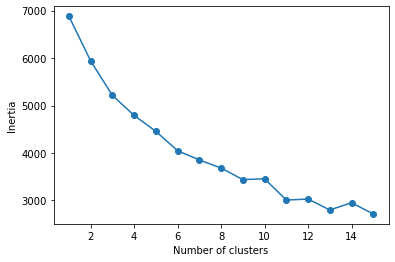

In [213]:
num_clusters_list = list(range(1, num_clusters + 1))
plt.plot(num_clusters_list, kmeans_inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on this evaluation there seems to be a slight elbow around 11 clusters. This is because the rate of change of inertia decreases dramatically here. However, this number of clusters implies that the algorithm is not clustering based on the categories in the dataset, but rather the principal components.

**8.3.2 Optimised K means ++ algorithm** - we'll use a max of 15 clusters

In [215]:
num_clusters = 15
kmeans_plus_inertias = num_of_clusters(data_pcomp, num_clusters, 'k-means++')
kmeans_plus_inertias

C:\Users\paddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[6881.034997694453,
 5884.061704722881,
 5213.31206842015,
 4792.27118643656,
 4442.067543391941,
 4184.056076746671,
 3784.609910254461,
 3600.8363948584633,
 3322.2710584925994,
 3083.1303800943056,
 2982.9040471809644,
 2750.3764152525146,
 2679.543837249928,
 2543.2176666337236,
 2427.432637552566]

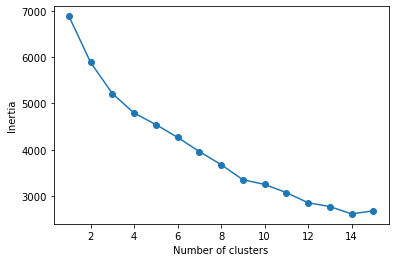

In [216]:
num_clusters_list = list(range(1, num_clusters + 1))
plt.plot(num_clusters_list, kmeans_inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This diagram suggests that 14 clusters should be used rather than the 11 found for the k means algorithm. This is because of the slight elbow at 14 clusters. However, again this suggests that the clustering is not based on the categories in the original dataset.

**8.3.3 Summary of implemented algorithms using PCA data**

Inertia values for different algorithms:
- Kmeans (4 clusters) = 4785.13
- Kmeans++ (4 clusters) = 4856.56
- Kmeans optimised (11 clusters) = 3008.84
- Kmeans++ optimised (14 clusters) = 2982.90

These inertia values imply that the best algorithm with 4 clusters was the kmeans++, as it had a slightly lower inertia value. This could be due to the initiation of the centroids position not being random in this algorithm. It was found that the best optimised algorithm was the kmeans++ algorithm with 14 clusters, again due to the lower inertia values.

It was found that the best overall algorithm was the kmeans++ algorithm with 14 clusters, due to it having the lowest inertia value. However, the presence of 14 clusters implies that data was not clustered based on categories of the data.

If predictions wanted to be made to see what category a patient fell into based on their blood test results, it would be advisable to use the kmeans++ algorithm with 4 clusters, so that it could be seen which category the patient falls into.

**8.4 K means model using original data (not PCA data)** - 4 clusters

In [217]:
data_without_categories = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].dropna() # drop the NaNs from the relevant data
scaled_data = scaler.fit_transform(data_without_categories)

In [226]:
Kmeans_model_without_pca = KMeans(n_clusters=4, init='random')
Kmeans_model.fit(scaled_data)
Kmeans_model.inertia_

5064.674549985471

**8.5 K means ++ model using original data (not PCA data)** - 4 clusters

In [231]:
Kmeans_model_without_pca = KMeans(n_clusters=4, init='k-means++')
Kmeans_model.fit(scaled_data)
Kmeans_model.inertia_

4932.976238610795

K means ++ algorithm seems to give a lower inertia than the k means algorithm. This could be due to the random intialisation of the centroids in the k means algorithm. It can also be seen that these models give higher inertias than when the PCA data was used.

**8.6 Optimising algorithms using original data (not PCA data)** - Using a maximum of 15 clusters

**8.6.1 Optimised K means algorithm using original data (not PCA data)**

In [233]:
num_clusters = 15
kmeans_inertias_without_pca = num_of_clusters(scaled_data, num_clusters, 'random')
kmeans_inertias_without_pca

C:\Users\paddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[7068.000000000002,
 6304.864390671074,
 5400.141492053198,
 5021.98161354316,
 4647.267858276684,
 4354.791115659506,
 4152.148288117458,
 3946.261931986297,
 3649.432699314963,
 3347.9223182975084,
 3346.5722364985168,
 3037.4554946035473,
 2971.644253986227,
 2932.3767301444745,
 2875.9663939327925]

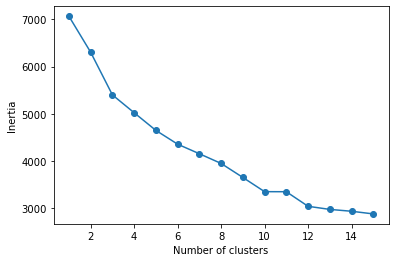

In [235]:
num_clusters_list = list(range(1, num_clusters + 1))
plt.plot(num_clusters_list, kmeans_inertias_without_pca, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on this there seems to be an elbow around 12 clusters, due to the decrease in rate of change of inertia. This does imply however that the clustering is not longer around the categories.

**8.6.1 Optimised K means ++ algorithm using original data (not PCA data)**

In [236]:
um_clusters = 15
kmeans_plus_inertias_without_pca = num_of_clusters(scaled_data, num_clusters, 'k-means++')
kmeans_plus_inertias_without_pca

C:\Users\paddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[7068.000000000002,
 6070.961359786813,
 5400.141492053198,
 4968.626081437477,
 4648.748644762983,
 4217.66301663032,
 4052.8946145082627,
 3691.005616345902,
 3462.1269461859824,
 3240.1855120424193,
 3041.328393312379,
 2897.551469214165,
 2790.6333713723743,
 2697.9015583221217,
 2596.928629797348]

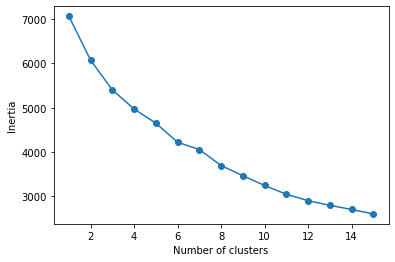

In [238]:
num_clusters_list = list(range(1, num_clusters + 1))
plt.plot(num_clusters_list, kmeans_plus_inertias_without_pca, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This graph showed that there was not an elbow in the inertia, meaning 15 clusters should be used. This again implies that the clustering is no longer around the datasets categories.

**8.3.3 Summary of implemented algorithms using original data**

Inertia values for different algorithms:
- Kmeans (4 clusters) = 5064.67
- Kmeans++ (4 clusters) = 4932.98
- Kmeans optimised (12 clusters) =  3037.46
- Kmeans++ optimised (15 clusters) = 2596.93

It can be seen that the best unoptimised model was the Kmeans++ model, due to its lower inertia. The best optimised model was the kmeans++ model with 15 clusters, with this model also being the best overall model using the original data

It was found that the best overall model, based on inertia, was the kmeans++ model using 15 clusters and the original dataset, implying that PCA may not be necessary for this dataset. However, it was recognised that this model is not ideal for future prediction of a patient's category based on blood test results, due to the presence of 15 clusters. Therefore, the kmeans++ model using 4 clusters should be used for prediction.

**9 Conclusions**

In this work the following were done:
- Summary statistics and visualisations of a dataset outlining a patient's blood test results and their HCV status were constructed. Many conclusions were drawn about patient's with different conditions based on the results of these, such as cirrhosis patients generally had higher creatinine levels.
- Principal component analysis techniques were then used to reduce the dimensionality of the dataset, prior to the implementation of machine learning algorithms
- Unsupervised machine learning algorithms were then used to fit the data, such as the Kmeans and Kmeans++ algorithms. This was done so that a future patients category could be predicted based on their blood test results.
- It was found that the best algorithm was the Kmeans++ algorithm using 15 clusters and the original dataset rather than the PCA dataset. This was because of it having the lowest inertia of all other algorithms. However, it wass noted that this algorithm would not be ideal for predicting a patients category, as it seems that the data is not being clustered based on category. 
- Therefore, it was decided that for any future category predictions that the Kmeans++ algorithm with 4 clusters should be used, even though this would give less accurate results than when 15 clusters are used (due to the higher inertia).

The following work could be done to improve the project:
- Other unsupervised machine learning algorithms could be implemented to see whether they would fit the data more accurately.
- Supervised machine learnign algorithms could be implemented based on the labels in the category column